In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D


In [ ]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def scale_mnist_data(train_images, test_images):
 
    train_images=train_images/255.
    test_images=test_images/255.
    return (train_images,test_images)

In [ ]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [ ]:
def get_model(input_shape):
  
    model=Sequential([
        Conv2D(8,(3,3),activation='relu',padding='SAME',input_shape=input_shape),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64,activation='relu',name='HLayer1'),
        Dense(64,activation='relu',name='Hlayer2'),
        Dense(10,activation='softmax')
    ])
    model.summary()
    return model

In [ ]:
model = get_model(scaled_train_images[0].shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
HLayer1 (Dense)              (None, 64)                100416    
_________________________________________________________________
Hlayer2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
__________________________________________________

In [ ]:
def compile_model(model):
  
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
compile_model(model)

In [ ]:
def train_model(model, scaled_train_images, train_labels):
   
    history=model.fit(scaled_train_images,train_labels,epochs=5,batch_size=256,verbose=2)
    return history

In [ ]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
235/235 - 13s - loss: 0.4747 - accuracy: 0.8637
Epoch 2/5
235/235 - 12s - loss: 0.1605 - accuracy: 0.9531
Epoch 3/5
235/235 - 12s - loss: 0.1088 - accuracy: 0.9679
Epoch 4/5
235/235 - 12s - loss: 0.0834 - accuracy: 0.9755
Epoch 5/5
235/235 - 12s - loss: 0.0667 - accuracy: 0.9802


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

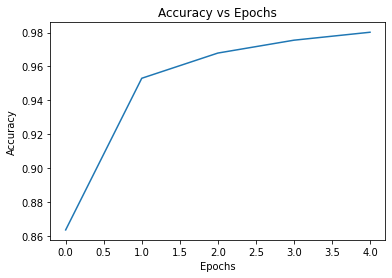

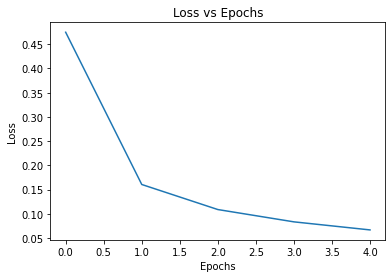

In [ ]:
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):
    
    
    test_loss,test_accuracy = model.evaluate(scaled_test_images, test_labels,verbose=2)
    return(test_loss,test_accuracy)

In [ ]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0703 - accuracy: 0.9777
Test loss: 0.07031639665365219
Test accuracy: 0.9776999950408936


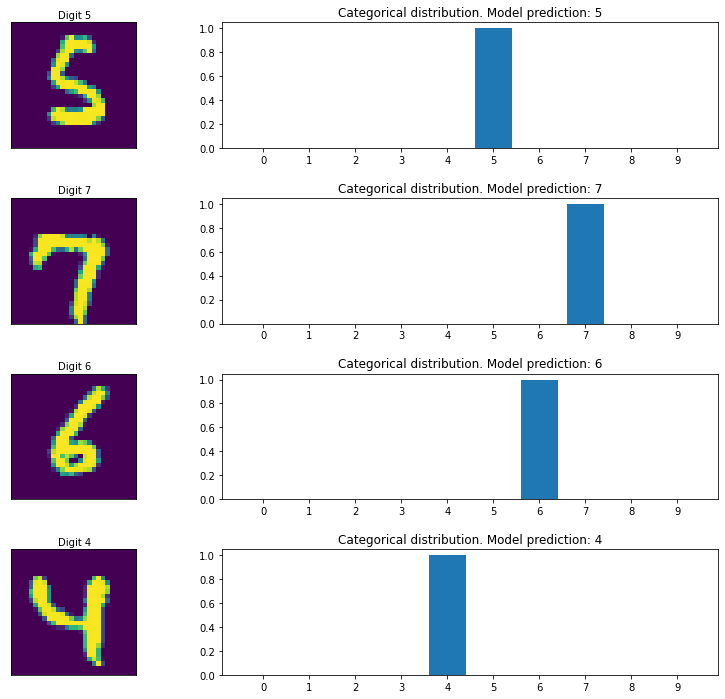

In [ ]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()